# Phần 5: Bài tập

**Bài 1**. Viết chương trình ConvertUnit1.py cho phép nhập một số thực x từ bàn phím, sau đó coi x là chiều dài tính bằng mét, hãy in ra số đo y của chiều dài đó tính bằng inches

In [7]:
x = float(input())
print(x * 39.3700787)

78.7401574


**Bài 2**. Viết chương trình nhập vào 4 số x1, y1, x2, y2 từ bàn phím.

Tính  và in ra khoảng cách Euclid giữa hai điểm (x1, y1) và (x2, y2).

Kết quả được làm tròn đến 2 số phần thập phân, sử dụng công thức round(a, 2) để làm tròn số a.

In [6]:
from math import sqrt

x1 = float(input("x1: "))
y1 = float(input("y1: "))
x2 = float(input("x2: "))
y2 = float(input("y2: "))

distance = round(sqrt(pow(x2 - x1, 2) + pow(y2 - y1, 2)), 2)
print(distance)

4.24


**Bài 3.** Viết chương trình cho phép nhập từ bàn phím tọa độ các điểm (x1, y1), (x2, y2), (x3, y3). Trong đó có các hàm:
- isTriangle kiểm tra ba tọa độ thực (x1, y1); (x2, y2) và (x3, y3)  có lập thành ba đỉnh của tam giác hay không, nếu đúng thì trả về true; ngược lại trả về false.
- isRightTriangle kiểm tra ba tọa độ thực (x1, y1); (x2, y2) và (x3, y3)  có lập thành ba đỉnh của tam giác vuông hay không, nếu đúng thì trả về true; ngược lại trả về false.

In [11]:
from math import sqrt, isclose


def isTriangle(x1, y1, x2, y2, x3, y3):
    a = sqrt(pow(x1 - x2, 2) + pow(y1 - y2, 2))
    b = sqrt(pow(x1 - x3, 2) + pow(y1 - y3, 2))
    c = sqrt(pow(x3 - x2, 2) + pow(y3 - y2, 2))
    if a + b > c and a + c > b and b + c > a:
        return True
    return False


def isRightTriangle(x1, y1, x2, y2, x3, y3):
    a = sqrt(pow(x1 - x2, 2) + pow(y1 - y2, 2))
    b = sqrt(pow(x1 - x3, 2) + pow(y1 - y3, 2))
    c = sqrt(pow(x3 - x2, 2) + pow(y3 - y2, 2))
    s = (a + b + c) / 2
    double_area = 2 * sqrt(s * (s - a) * (s - b) * (s - c))
    is_right_triangle = (
        isclose(a * b, double_area)
        or isclose(b * c, double_area)
        or isclose(c * a, double_area)
    )

    if isTriangle(x1, y1, x2, y2, x3, y3) and is_right_triangle:
        return True
    return False


x1 = float(input("x1: "))
y1 = float(input("y1: "))
x2 = float(input("x2: "))
y2 = float(input("y2: "))
x3 = float(input("x3: "))
y3 = float(input("y3: "))

if isRightTriangle(x1, y1, x2, y2, x3, y3):
    print("Three points could form a right triangle")
elif isTriangle(x1, y1, x2, y2, x3, y3):
    print("Three points could form a triangle")
else:
    print("Three points could not form a triangle")

Three points could form a triangle


**Bài 4.** Quãng đường S đi được trong chuyển động nhanh dần đều tính theo

---

công thức: S = v0*t + a*t*t/2, với v0 là vận tốc ban đầu, t là thời gian đi và a là gia tốc.
Xây dựng chương trình MovementTime.py cho phép nhập các giá trị S, v0 và a kiểu float (theo thứ tự đó). Sau đó kiểm tra nếu cả ba giá trị đều dương thì tính thời gian t từ công thức trên (thời gian t > 0 - tính bằng giây) và in ra màn hình. Ngược lại thì in ra màn hình -1.

In [2]:
from math import sqrt

S = float(input("S: "))
v0 = float(input("v0: "))
a = float(input("a: "))


def solveQuadratic(a, b, c):
    if a == 0 and b == 0 and c == 0:
        return None
    if a == 0 and b == 0:
        return []
    if a == 0:
        return [-c / b]
    delta = b**2 - 4 * a * c
    if delta < 0:
        return []
    if delta == 0:
        return [-b / (2 * a)]
    if delta > 0:
        return [(-b - sqrt(delta)) / (2 * a), (-b + sqrt(delta)) / (2 * a)]
    
if (S > 0 and v0 > 0 and a > 0):
    (x1, x2) = solveQuadratic(a, v0, -S)
    print(x2)
else:
    print(-1)

0.2742918851774318


**Bài 5.** Viết chương trình cho phép nhập 03 số thực vào các biến a, b, c theo đúng thứ tự này từ bàn phím, sau đó giải phương trình bậc hai

    ax^2 + bx + c = 0 ( a*x*x + b*x + c = 0).

Kết quả cần được in ra trên một dòng, trường hợp :
- Phương trình không có nghiệm thực, in ra "Vo nghiem" (không có dấu " và ", in xong xuống dòng).
- Trường hợp có 01 nghiệm (kể cả nghiệm kép hoặc phương trình suy biến thành bậc nhất), in ra nghiệm đó.
- Trường hợp có 02 nghiệm phân biệt, in ra 2 nghiệm trên một dòng, ở giữa có đúng 01 khoảng trống, thứ tự in nghiệm ứng với - căn delta trước, + căn delta sau.

Các nghiệm số cần in ra 03 chữ số ở phần thập phân.

In [5]:
from math import sqrt


def solveQuadratic(a, b, c):
    if a == 0 and b == 0 and c == 0:
        print("Vo so nghiem")
    elif a == 0 and b == 0:
        print("Vo nghiem")
    elif a == 0:
        print(round(-c / b, 3))
    else:
        delta = b**2 - 4 * a * c
        if delta < 0:
            print("Vo nghiem")
        elif delta == 0:
            print(round(-b / (2 * a), 3))
        elif delta > 0:
            print(
                f"{round((-b - sqrt(delta)) / (2 * a),3)} {round((-b + sqrt(delta)) / (2 * a),3)}"
            )

**Bài 6.** Một số nguyên dương được gọi là đối xứng nếu viết các chữ số của nó theo chiều ngược lại vẫn được chính số đó. Ví dụ: 1, 2, …, 11, 22, … 101, 121, … là số đối xứng.
Viết chương trình PalindromeNumbers.py, với hàm:
- isPalindrome(k), kiểm tra số nguyên k có là đối xứng hay không, nếu đúng trả về true, ngược lại trả về false.

Chương trình cho phép nhập hai số nguyên M và N từ bàn phím, sau đó sử dụng phương thức isPalindrome để kiểm tra và liệt kê các số đối xứng nằm giữa M và N (xét các trường hợp khi M < N hoặc N< M) ra màn hình trên một dòng, 2 số cách nhau bởi 01 khoảng trống

In [11]:
def isPalindrome(k):
    string_k = str(int(k))
    if not string_k:
        return False
    if len(string_k) == 1:
        return True
    left = 0
    right = len(string_k) - 1
    while left <= right:
        if string_k[left] != string_k[right]:
            return False
        left += 1
        right -= 1
    return True


m = int(input("m: "))
n = int(input("n: "))

if m > n:
    temp = m
    m = n
    n = temp

for k in range(m, n):
    if isPalindrome(k):
        print(k, end=" ")

101 111 121 131 141 151 161 171 181 191 202 212 222 232 242 252 262 272 282 292 303 313 323 333 343 353 363 373 383 393 404 414 424 434 444 454 464 474 484 494 505 515 525 535 545 555 565 575 585 595 606 616 626 636 646 656 666 676 686 696 707 717 727 737 747 757 767 777 787 797 808 818 828 838 848 858 868 878 888 898 909 919 929 939 949 959 969 979 989 999 

**Bài 7.** Số siêu nguyên tố là số nguyên tố mà khi bỏ 1 số tùy ý các chữ số bên phải của nó sao cho phần còn lại khác 0, thì đó vẫn là số nguyên tố.
Viết chương trình kiểm tra một số nguyên n nhập từ bàn phím có phải là một số siêu nguyên tố hay không?

In [18]:
from math import sqrt


def isPrime(input):
    if input == 0:
        return False
    if input == 1:
        return False
    for i in range(2, int(sqrt(input)) + 1):
        if input % i == 0:
            return False
    return True


number = int(input("input: "))


def checkSuperPrime(number):
    while number > 0:
        if isPrime(number):
            number //= 10
        else:
            return False
    return True


print(checkSuperPrime(number))

True


**Bài 8.** Viết chương trình cho phép nhập x, n từ bàn phím và tính exp theo công thức **Taylor**:
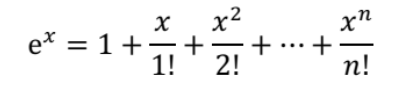

In [24]:
from math import factorial

x = float(input("x: "))
n = int(input("n: "))


def calculateTaylorSeries(x, n):
    if x < 0 or n < 0:
        return -1
    if n == 0:
        return 1
    else:
        return (pow(x, n) / factorial(n)) + calculateTaylorSeries(x, n - 1)


print(calculateTaylorSeries(x, n))

12.182493960698455


**Bài 9.** Viết chương trình nhập vào số nguyên dương n từ bàn phím. Hãy chỉ ra cách phân tích số nguyên dương
n thành tích của các số nguyên tố


In [15]:
from math import sqrt

x = int(input("x: "))

def factorAnalysis(x):
    factor_list = []
    limit = int(x / 2) + 1
    for i in range(2, limit):
        exp = 0
        sublist = []
        if (x % i == 0):
            sublist = [i, 1]
            x /= i
            while (x % i == 0):
                sublist[1] += 1
                x /= i
            factor_list.append(sublist)

    return factor_list

print(factorAnalysis(x))

[[2, 2], [19, 1], [313, 1]]


**Bài 10.** Viết chương trình thực hiện in ra số hoàn hảo nhỏ hơn n (với n được nhập từ bàn phím). Số hoàn hảo là số mà tổng của các ước nhỏ hơn nó bằng chính nó.
VD: 6 là số hoàn hảo (6 = 1 + 2 + 3)

In [27]:
def isPerfectNumber(number):
    if not isinstance(number, int) or number <= 0:
        return False

    divisors_sum = sum(
        divisor for divisor in range(1, int(number / 2) + 1) if number % divisor == 0
    )

    return divisors_sum == number

# for i in range(6, 10000):
#     if isPerfectNumber(i):
#         print(i)

6
28
496
8128
